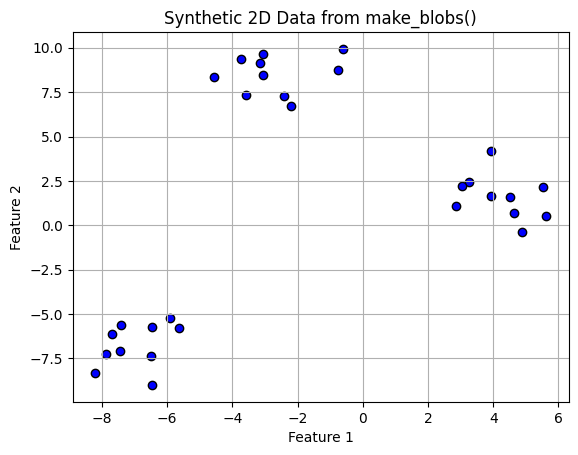

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate the synthetic dataset
X, _ = make_blobs(n_samples=30, centers=3, random_state=42, cluster_std=1.2)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k')
plt.title("Synthetic 2D Data from make_blobs()")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


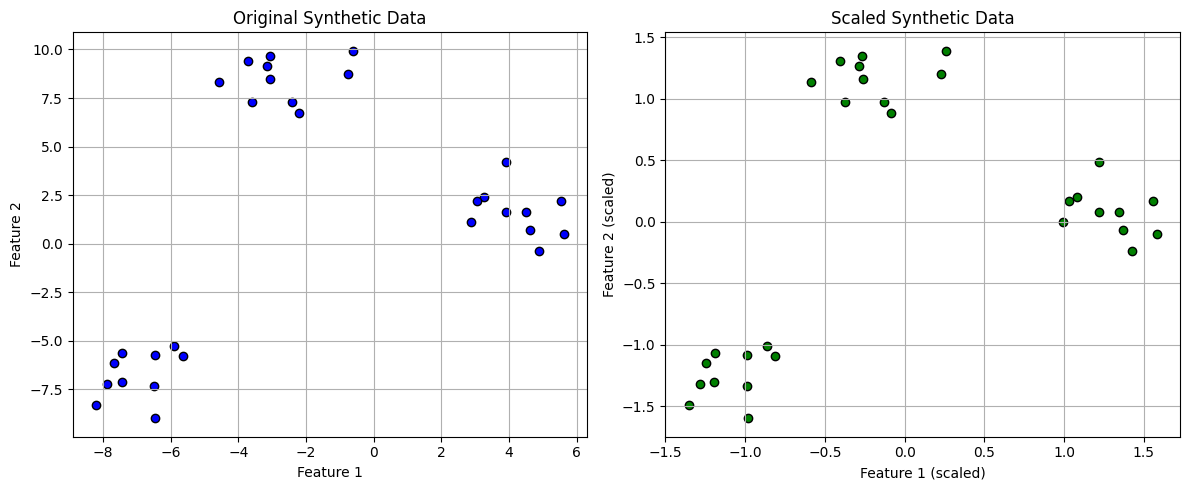

In [10]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate the synthetic dataset
X, _ = make_blobs(n_samples=30, centers=3, random_state=42, cluster_std=1.2)

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a figure with two subplots: original vs scaled
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot original data
axes[0].scatter(X[:, 0], X[:, 1], c='blue', edgecolor='black')
axes[0].set_title("Original Synthetic Data")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].grid(True)

# Plot scaled data
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c='green', edgecolor='black')
axes[1].set_title("Scaled Synthetic Data")
axes[1].set_xlabel("Feature 1 (scaled)")
axes[1].set_ylabel("Feature 2 (scaled)")
axes[1].grid(True)

plt.tight_layout()
plt.show()


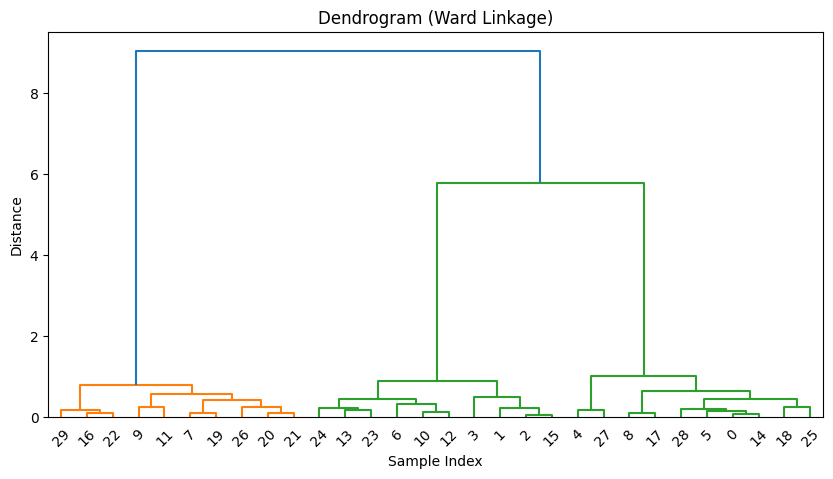

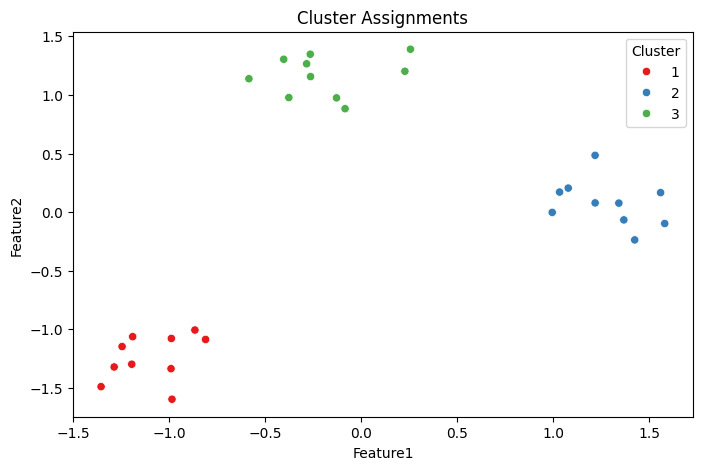

In [4]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Step 2: Generate synthetic dataset
X, _ = make_blobs(n_samples=30, centers=3, random_state=42, cluster_std=1.2)

# Step 3: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Perform hierarchical clustering using Ward's method
link_matrix = linkage(X_scaled, method='ward')

# Step 5: Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(link_matrix)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Step 6: Create flat clusters (optional)
clusters = fcluster(link_matrix, t=3, criterion='maxclust')

# Step 7: Visualize clusters in 2D
df = pd.DataFrame(X_scaled, columns=["Feature1", "Feature2"])
df["Cluster"] = clusters

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Feature1", y="Feature2", hue="Cluster", palette="Set1")
plt.title("Cluster Assignments")
plt.show()


<ipython-input-16-ee8a48cf8d28>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="pastel")


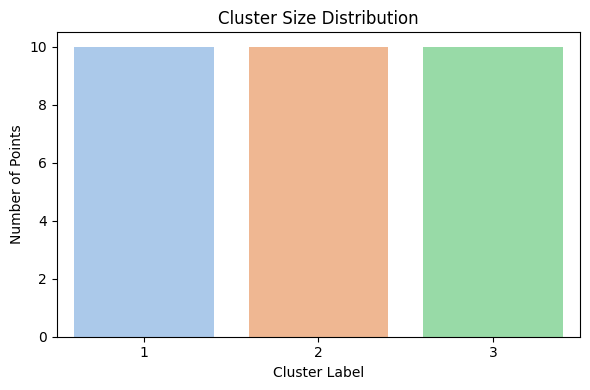

In [16]:
#  Plot 8: Cluster size distribution
cluster_counts = df["Cluster"].value_counts().sort_index()
plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="pastel")
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Points")
plt.tight_layout()
plt.savefig("cluster_size_barplot.png")
plt.show()


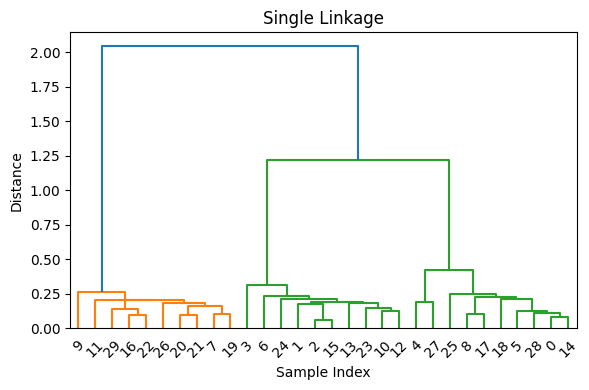

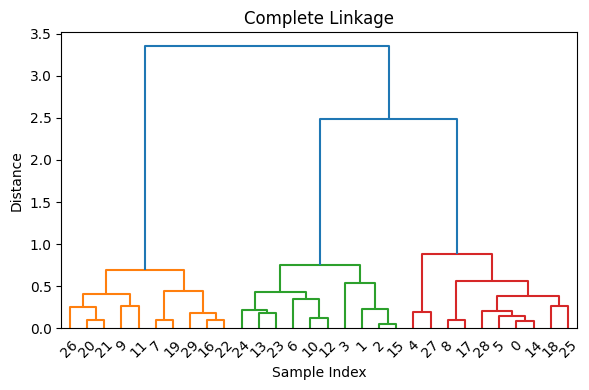

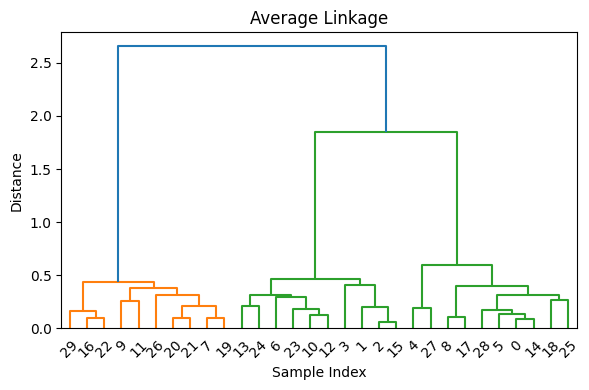

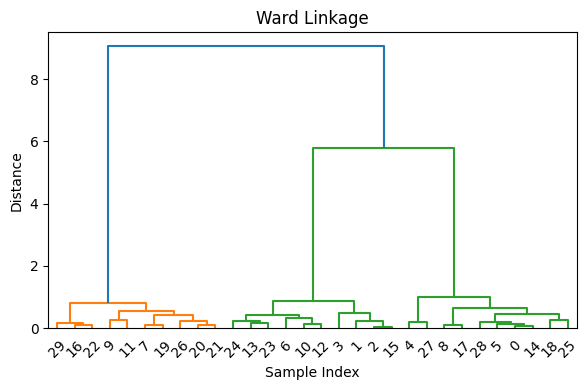

In [5]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate and scale the dataset
X, _ = make_blobs(n_samples=30, centers=3, random_state=42, cluster_std=1.2)
X_scaled = StandardScaler().fit_transform(X)

# Plot dendrograms for different linkage methods
for method in ['single', 'complete', 'average', 'ward']:
    plt.figure(figsize=(6, 4))
    Z = linkage(X_scaled, method=method)
    dendrogram(Z)
    plt.title(f'{method.title()} Linkage')
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.tight_layout()
    plt.show()
